In [55]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [56]:
tokenizer = Tokenizer()
data = open("music_2.txt","r").read()

corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1
print(total_words)

750


In [57]:
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)
    
# pad sequences
max_sequences_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen = max_sequences_len, padding = "pre"))

# create predictors and label
xs, labels = input_sequences[:, :-1], input_sequences[:, -1]
ys = keras.utils.to_categorical(labels, num_classes=total_words)

In [58]:
print(tokenizer.word_index["in"])
print(tokenizer.word_index["the"])
print(tokenizer.word_index["town"])
print(tokenizer.word_index["of"])
print(tokenizer.word_index["athy"])
print(tokenizer.word_index["one"])
print(tokenizer.word_index["jeremy"])
print(tokenizer.word_index["lanigan"])

259
664
129


KeyError: 'of'

In [59]:
print(xs[6])
print(ys[6])

[  0   0   0   0  29 350 351   8   5   6  63]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0

In [60]:
print(xs[5])
print(ys[5])

[  0   0   0   0   0  29 350 351   8   5   6]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0

In [61]:
print(tokenizer.word_index)

{'main': 1, 'na': 2, 'ki': 3, 'ke': 4, 'dil': 5, 'mein': 6, 'hai': 7, 'ho': 8, 'se': 9, 'tere': 10, 'bhi': 11, 'tu': 12, 'gaya': 13, 'mere': 14, 'teri': 15, 'hi': 16, 'hain': 17, 'o': 18, 'kariye': 19, 'meri': 20, 'kya': 21, 'phir': 22, 'kalle': 23, 'tujhe': 24, 'aa': 25, 'mera': 26, 'gayi': 27, 'tera': 28, 'tum': 29, 'jaane': 30, 'ko': 31, 'kuch': 32, 'naal': 33, 'oye': 34, 'tumko': 35, 'ban': 36, 'karke': 37, 'ye': 38, 'maza': 39, 'ka': 40, 'toh': 41, 'jab': 42, 'sohniye': 43, 'hoon': 44, 'jo': 45, 'jaise': 46, 'tod': 47, 'do': 48, 'ne': 49, 'kar': 50, 'jaaunga': 51, 'vi': 52, 'kithe': 53, 'aur': 54, 'woh': 55, 'khabar': 56, 'iss': 57, 'nahi': 58, 'hum': 59, 'saanu': 60, 'diya': 61, 'jaaye': 62, 'kisi': 63, 'mujhe': 64, 'aaj': 65, 'to': 66, 'baar': 67, 'har': 68, 'galiyon': 69, 'nazar': 70, 'bhar': 71, 'ab': 72, 'pe': 73, 'chuta': 74, 'deh': 75, 'jaayi': 76, 'ja': 77, 'yeh': 78, 'silky': 79, 'bana': 80, 'pyar': 81, 'si': 82, 'thi': 83, 'tujhpe': 84, 'naâ€¦': 85, 'tujhko': 86, 'vich':

In [62]:
model = keras.Sequential([
    keras.layers.Embedding(total_words, 100, input_length =  max_sequences_len-1),
    keras.layers.Bidirectional(keras.layers.LSTM(150)),
    keras.layers.Dense(total_words, activation = "softmax")
])

In [63]:
model.compile(optimizer = keras.optimizers.Adam(learning_rate = 0.01), loss = "categorical_crossentropy", metrics = ["accuracy"])

In [64]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 11, 100)           75000     
_________________________________________________________________
bidirectional_3 (Bidirection (None, 300)               301200    
_________________________________________________________________
dense_3 (Dense)              (None, 750)               225750    
Total params: 601,950
Trainable params: 601,950
Non-trainable params: 0
_________________________________________________________________


In [65]:
history = model.fit(xs, ys, epochs = 100, verbose = 1)

Train on 1837 samples
Epoch 1/100
1837/1837 [==============================] - 2s 1ms/sample - loss: 6.2304 - accuracy: 0.0261
Epoch 2/100
1837/1837 [==============================] - 1s 367us/sample - loss: 5.0070 - accuracy: 0.1192
Epoch 3/100
1837/1837 [==============================] - 1s 365us/sample - loss: 3.5205 - accuracy: 0.3283
Epoch 4/100
1837/1837 [==============================] - 1s 362us/sample - loss: 2.2110 - accuracy: 0.5226
Epoch 5/100
1837/1837 [==============================] - 1s 356us/sample - loss: 1.2445 - accuracy: 0.6990
Epoch 6/100
1837/1837 [==============================] - 1s 360us/sample - loss: 0.7504 - accuracy: 0.8231
Epoch 7/100
1837/1837 [==============================] - 1s 358us/sample - loss: 0.5071 - accuracy: 0.8753
Epoch 8/100
1837/1837 [==============================] - 1s 365us/sample - loss: 0.4052 - accuracy: 0.8879
Epoch 9/100
1837/1837 [==============================] - 1s 356us/sample - loss: 0.3661 - accuracy: 0.8977
Epoch 10/100
1837

1837/1837 [==============================] - 1s 358us/sample - loss: 0.2298 - accuracy: 0.9036
Epoch 77/100
1837/1837 [==============================] - 1s 357us/sample - loss: 0.2271 - accuracy: 0.9042
Epoch 78/100
1837/1837 [==============================] - 1s 358us/sample - loss: 0.2311 - accuracy: 0.9031
Epoch 79/100
1837/1837 [==============================] - 1s 370us/sample - loss: 0.2327 - accuracy: 0.9015
Epoch 80/100
1837/1837 [==============================] - 1s 357us/sample - loss: 0.2280 - accuracy: 0.9075
Epoch 81/100
1837/1837 [==============================] - 1s 359us/sample - loss: 0.2248 - accuracy: 0.9102
Epoch 82/100
1837/1837 [==============================] - 1s 362us/sample - loss: 0.2327 - accuracy: 0.8977
Epoch 83/100
1837/1837 [==============================] - 1s 355us/sample - loss: 0.2281 - accuracy: 0.9047
Epoch 84/100
1837/1837 [==============================] - 1s 359us/sample - loss: 0.2245 - accuracy: 0.9124
Epoch 85/100
1837/1837 [=================

In [66]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")

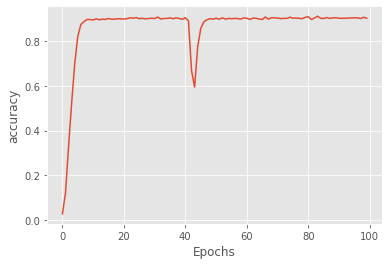

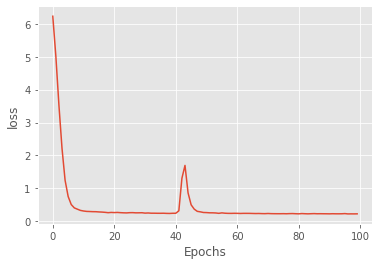

In [67]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [77]:
seed_text = "dil ka kya pata tumko chaunga"
next_words = 20
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen = max_sequences_len-1, padding = "pre")
    predicted = model.predict_classes(token_list, verbose = 0)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

dil ka kya pata tumko chaunga nazar se milaayi maza aa gayaâ€¦ ho gaya ho mujhse aa gayi mosture mein kisi iss qadar hain nain matakke


In [78]:
import tensorflow as tf
from tf_agents.networks import q_network
from tf_agents.agents.dqn import dqn_agent

q_net = q_network.QNetwork(
  train_env.observation_spec(),
  train_env.action_spec(),
  fc_layer_params=(100,))

agent = dqn_agent.DqnAgent(
  train_env.time_step_spec(),
  train_env.action_spec(),
  q_network=q_net,
  optimizer=optimizer,
  td_errors_loss_fn=common.element_wise_squared_loss,
  train_step_counter=tf.Variable(0))

agent.initialize()

ModuleNotFoundError: No module named 'tf_agents'